# Polynomial Regression

In [60]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

## 1/ Dataset

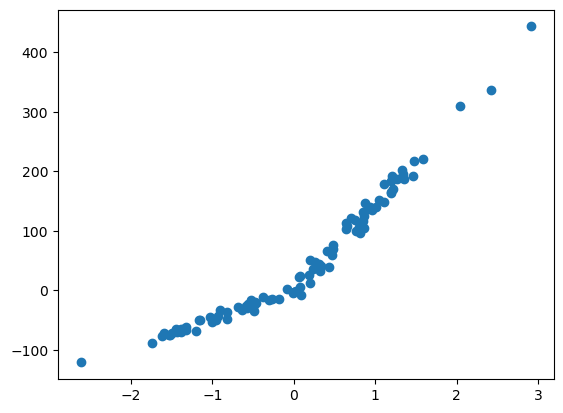

In [61]:
m, n = 100, 1
x, y = make_regression(n_samples=m, n_features=n, noise=10)

# We sort the datas
xy = np.column_stack((x, y))
xy_sorted = xy[np.argsort(xy[:, 0])]

# print(xy, np.argsort(xy[:, 0]), sep="\n\n")

x = xy_sorted[:, 0].reshape(-1, 1)
y = xy_sorted[:, 1]

y = y + abs(y/2)
plt.scatter(x, y)

In [62]:
print(x.shape)
print(y.shape)

(100, 1)
(100,)


In [63]:
# We transform y from a 1D table to a 2D table
y = y.reshape(y.shape[0], 1)
print(y.shape)

(100, 1)


## 2/ X matrix

In [64]:
X = np.hstack((x**2, x, np.ones(x.shape)))
print(X)

[[ 6.86232019e+00 -2.61960306e+00  1.00000000e+00]
 [ 3.04075109e+00 -1.74377495e+00  1.00000000e+00]
 [ 2.62421153e+00 -1.61994183e+00  1.00000000e+00]
 [ 2.55473929e+00 -1.59835518e+00  1.00000000e+00]
 [ 2.33616146e+00 -1.52845067e+00  1.00000000e+00]
 [ 2.30660765e+00 -1.51875201e+00  1.00000000e+00]
 [ 2.22363511e+00 -1.49118581e+00  1.00000000e+00]
 [ 2.09227084e+00 -1.44646840e+00  1.00000000e+00]
 [ 2.08128895e+00 -1.44266731e+00  1.00000000e+00]
 [ 2.07297602e+00 -1.43978332e+00  1.00000000e+00]
 [ 1.93265324e+00 -1.39019899e+00  1.00000000e+00]
 [ 1.91876248e+00 -1.38519402e+00  1.00000000e+00]
 [ 1.86547310e+00 -1.36582323e+00  1.00000000e+00]
 [ 1.75202666e+00 -1.32364144e+00  1.00000000e+00]
 [ 1.74502019e+00 -1.32099212e+00  1.00000000e+00]
 [ 1.45317642e+00 -1.20547767e+00  1.00000000e+00]
 [ 1.35866006e+00 -1.16561574e+00  1.00000000e+00]
 [ 1.33783339e+00 -1.15664748e+00  1.00000000e+00]
 [ 1.05113919e+00 -1.02525079e+00  1.00000000e+00]
 [ 1.01509127e+00 -1.00751738e+

## 3/ Theta

In [65]:
theta = np.random.randn(3, 1)
print(theta)

[[ 0.52929881]
 [ 0.14126431]
 [-1.02769862]]


## 4/ Model

In [66]:
def model(X, theta):
    return X.dot(theta)

In [67]:
Y = model(X, theta)
print(Y)

[[ 2.23446287]
 [ 0.33543415]
 [ 0.13245346]
 [ 0.09873131]
 [-0.00708667]
 [-0.02135939]
 [-0.06138254]
 [-0.12459651]
 [-0.12987225]
 [-0.13386488]
 [-0.20113306]
 [-0.2077784 ]
 [-0.233248  ]
 [-0.28733629]
 [-0.29067055]
 [-0.42882504]
 [-0.47322137]
 [-0.48297801]
 [-0.61616324]
 [-0.63273827]
 [-0.67598522]
 [-0.69633856]
 [-0.72211249]
 [-0.78622778]
 [-0.79103929]
 [-0.87718754]
 [-0.90200238]
 [-0.92540498]
 [-0.93198243]
 [-0.93753062]
 [-0.95106019]
 [-0.95302366]
 [-0.95833003]
 [-0.97004374]
 [-0.97137677]
 [-0.97435676]
 [-0.97584019]
 [-0.97797734]
 [-1.00408271]
 [-1.02139728]
 [-1.02737666]
 [-1.03608795]
 [-1.0356393 ]
 [-1.02950682]
 [-1.02687028]
 [-1.02677505]
 [-1.02307509]
 [-1.01682635]
 [-1.0138317 ]
 [-1.01338735]
 [-1.01080703]
 [-0.98343898]
 [-0.98092697]
 [-0.97768694]
 [-0.96512256]
 [-0.95616761]
 [-0.93617058]
 [-0.92899762]
 [-0.92243545]
 [-0.87955421]
 [-0.86928278]
 [-0.84796619]
 [-0.83482231]
 [-0.83355154]
 [-0.71989745]
 [-0.71800857]
 [-0.71323

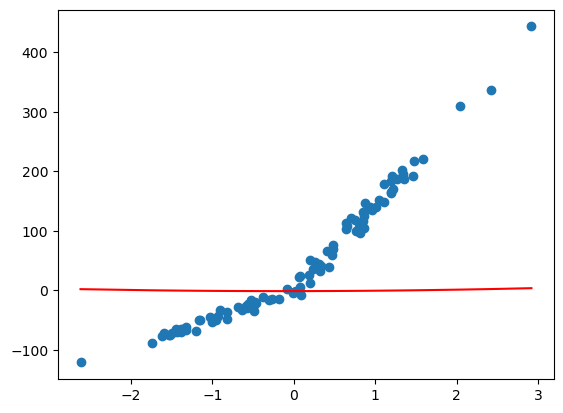

In [68]:
plt.scatter(x, y)
plt.plot(x, Y, c='red')

## 5/ Cost function

In [69]:
def cost_function(X, y, theta):
    m = len(y)
    return 1 / (2 * m) * np.sum((model(X, theta) - y)**2)

In [70]:
cost_function(X, y, theta)

6629.612096473819

## 6/ Gradient descent

In [71]:
def grad(X, y, theta):
    m = len(y)
    return 1 / m * X.T.dot(model(X, theta) - y)

In [72]:
def gradient_descent(X, y, theta, learn_rate=0.01, n_iter=1000):
    cost_history = np.zeros(n_iter)
    for i in range(n_iter):
        theta -= learn_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)

    return theta, cost_history

In [73]:
learn_rate, n_iter = 0.01, 1000
theta_final, cost_history = gradient_descent(X, y, theta, learn_rate, n_iter)
print(theta_final)

[[19.59294825]
 [95.33250063]
 [21.4396321 ]]


## 8/ Predictions

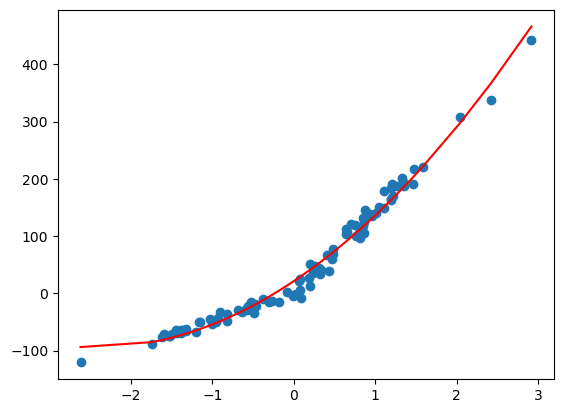

In [74]:
predictions = model(X, theta_final)
plt.scatter(x, y)
plt.plot(x, predictions, c='red')

## 7/ Cost history

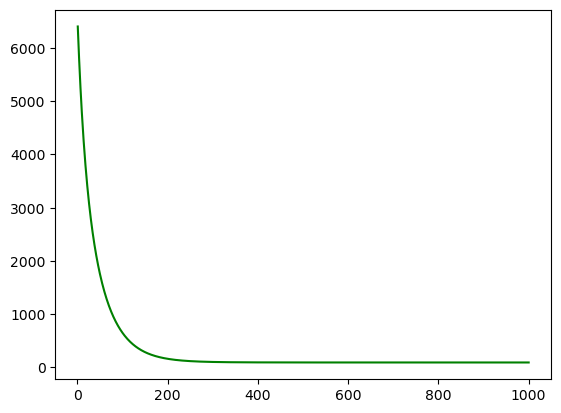

In [75]:
plt.plot(np.arange(1, n_iter+1), cost_history, c='green')

## 8/ Determnination Coefficient

In [76]:
def determ_coef(y, predictions):
    u = ((y - predictions)**2).sum()
    v = ((y - y.mean())**2).sum()

    return 1 - u/v

In [77]:
r = determ_coef(y, predictions)
print(r)

0.9832247481943958
